# Gaussian Naive Bayes

### Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

**The idea is to provide Year, IMDb and Runtime as an Input to "Gaussian Naive Bayes" model, train it further and predict the values to know whether Netflix will fetch that particular movie on its OTT platform **

|Year |IMDb	| Runtime | Netflix |
|-----|-----|---------|---------|
|2010 |	8.8	| 148.0	  | 1       |
|1999 |	8.7	| 136.0	  | 1       |
|2018 |	8.5	| 149.0	  | 1       |
|1985 |	8.5	| 116.0	  | 1       |
|1966 |	8.8	| 161.0	  | 1       |

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../Resources/cleaned_data.csv")
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Runtime,production_company,Top_Genres,Top_Director
0,Inception,2010,13+,8.8,8.7,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller",United States,148.0,Warner Bros.,Action,Christopher Nolan
1,The Matrix,1999,18+,8.7,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,136.0,NaN,Action,Lana Wachowski
2,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,149.0,NaN,Action,Anthony Russo
3,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,116.0,NaN,Adventure,Robert Zemeckis
4,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,Sergio Leone,Western,Italy,161.0,NaN,Western,Sergio Leone


### Data Cleanup

In [3]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country', 'Runtime',
       'production_company', 'Top_Genres', 'Top_Director'],
      dtype='object')

In [4]:
# check all columns with any missing/null values
df.isna().sum()

Title                     0
Year                      0
Age                    9391
IMDb                    571
Rotten Tomatoes       11589
Netflix                   0
Hulu                      0
Prime Video               0
Disney+                   0
Directors               726
Genres                  275
Country                 435
Runtime                 592
production_company    14035
Top_Genres              275
Top_Director            726
dtype: int64

In [5]:
# Count total no of records
df['Title'].count()

16747

In [6]:
# get unique values from Netflix
df['Netflix'].unique()

array([1, 0], dtype=int64)

In [7]:
# drop null values from IMDb and Runtime
df = df.dropna(subset=['IMDb'])
df = df.dropna(subset=['Runtime'])

In [8]:
# Re-count total no of records after drop
df['Title'].count()

15822

### Analyze the data on Scatter plot

Text(0, 0.5, 'Netflix')

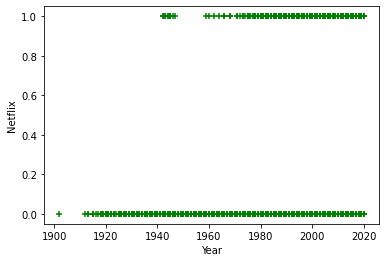

In [9]:
# Check the data for Year vs Netflix
x = df['Year']
y = df['Netflix']
plt.scatter(x,y, marker='+',color='Green')
plt.xlabel('Year')
plt.ylabel('Netflix')

Text(0, 0.5, 'Netflix')

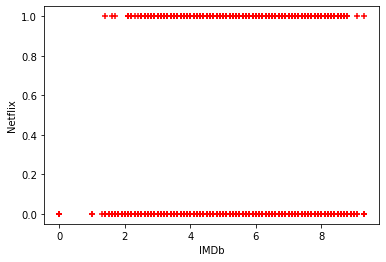

In [10]:
# Check the data for IMDb vs Netflix
x = df['IMDb']
y = df['Netflix']
plt.scatter(x,y, marker='+',color='red')
plt.xlabel('IMDb')
plt.ylabel('Netflix')

Text(0, 0.5, 'Netflix')

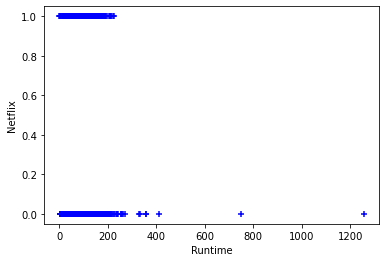

In [11]:
# Check the data for Rotten Runtime vs Netflix
x = df['Runtime']
y = df['Netflix']
plt.scatter(x,y, marker='+',color='blue')
plt.xlabel('Runtime')
plt.ylabel('Netflix')

### Set the Features (Input) and Labels (Output)

In [12]:
# set the features and label
features = df[['Year', 'IMDb', 'Runtime']]
label = df['Netflix']

In [13]:
Temp_df = df[['Year', 'IMDb', 'Runtime','Netflix']]
Temp_df.head()

,Year,IMDb,Runtime,Netflix
0,2010,8.8,148.0,1
1,1999,8.7,136.0,1
2,2018,8.5,149.0,1
3,1985,8.5,116.0,1
4,1966,8.8,161.0,1


### Split train and test data (70/30)

In [14]:
# split train and test data (70/30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.3)

### Get the naive bayes model and Train it

In [15]:
# get naive bayes model from sklearn library
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [16]:
# Train the model
model.fit(X_train,y_train)

GaussianNB()

In [17]:
# get model score
model.score(X_test,y_test)

0.7488940383400042

### Predict the values based on Features and Labels for sample 10 records

In [18]:
# get first 10 samples for Features
X_test[0:10]

,Year,IMDb,Runtime
16352,2006,5.4,98.0
11344,2005,5.1,98.0
12417,2009,6.9,94.0
3236,2008,5.8,136.0
6986,2010,6.5,129.0
8375,2012,4.6,87.0
6126,1993,6.2,94.0
2505,2013,6.1,105.0
9119,1999,4.9,115.0
13184,2007,4.6,90.0


In [19]:
# get first 10 samples for Labels
y_test[0:10]

16352    0
11344    0
12417    0
3236     1
6986     0
8375     0
6126     0
2505     1
9119     0
13184    0
Name: Netflix, dtype: int64

In [20]:
# predict Netflix values for first 10 samples
model.predict(X_test[0:10])

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
model.predict_proba(X_test[:10])

array([[0.70757263, 0.29242737],
       [0.76247252, 0.23752748],
       [0.54955402, 0.45044598],
       [0.45794068, 0.54205932],
       [0.41020708, 0.58979292],
       [0.72948739, 0.27051261],
       [0.95586766, 0.04413234],
       [0.50255478, 0.49744522],
       [0.88298119, 0.11701881],
       [0.7919697 , 0.2080303 ]])

### Save the Predicted values for each input row back to df

In [22]:
# get the Predicted values in variable
P_Netflix = model.predict(df[['Year', 'IMDb', 'Runtime']])
P_Netflix

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
# Dump the Predicted values in df
df['P_Netflix'] = P_Netflix
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Runtime,production_company,Top_Genres,Top_Director,P_Netflix
0,Inception,2010,13+,8.8,8.7,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller",United States,148.0,Warner Bros.,Action,Christopher Nolan,1
1,The Matrix,1999,18+,8.7,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,136.0,NaN,Action,Lana Wachowski,0
2,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,149.0,NaN,Action,Anthony Russo,1
3,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,116.0,NaN,Adventure,Robert Zemeckis,0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,Sergio Leone,Western,Italy,161.0,NaN,Western,Sergio Leone,0


### Agewise Netflix Movie Share

In [24]:
%%HTML
<div class='tableauPlaceholder' id='viz1622157941066' style='position: relative'><noscript><a href='#'><img alt='Agewise Netflix Movie Share ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ag&#47;AgewiseNetflixMovieShare&#47;AgewiseNetflixMovieShare&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AgewiseNetflixMovieShare&#47;AgewiseNetflixMovieShare' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ag&#47;AgewiseNetflixMovieShare&#47;AgewiseNetflixMovieShare&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1622157941066');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Netflix Movie Count vs IMDb Rating

In [25]:
%%HTML
<div class='tableauPlaceholder' id='viz1622165527868' style='position: relative'><noscript><a href='#'><img alt='Netflix Movie Count vs IMDb Rating ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ag&#47;AgewiseNetflixMovieShare&#47;NetflixMovieCountvsIMDbRating&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AgewiseNetflixMovieShare&#47;NetflixMovieCountvsIMDbRating' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ag&#47;AgewiseNetflixMovieShare&#47;NetflixMovieCountvsIMDbRating&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1622165527868');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>